#  Model Random Forest

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

### 1) Reading of the processed dataset

In [36]:
X_train = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/X_train.csv")
y_train = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/y_train.csv")

X_test = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/X_test.csv")
y_test = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/y_test.csv")

df = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/raw/diabete.csv")

y_test = list(y_test["Outcome"])
y_train = list(y_train["Outcome"])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,106,56,27,165,29.0,0.426,22
1,1,89,66,23,94,28.1,0.167,21
2,1,116,78,29,180,36.1,0.496,25
3,6,115,60,39,125,33.7,0.245,40
4,5,136,82,29,125,32.3,0.640,69


### 2) Model initialisation and training

In [37]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  

# Definition of hyperparameter search space:
hyperparams = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

# Exhaustive search hyperparameter
accs = []
for combination in ParameterGrid(hyperparams):
    model = RandomForestClassifier(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))


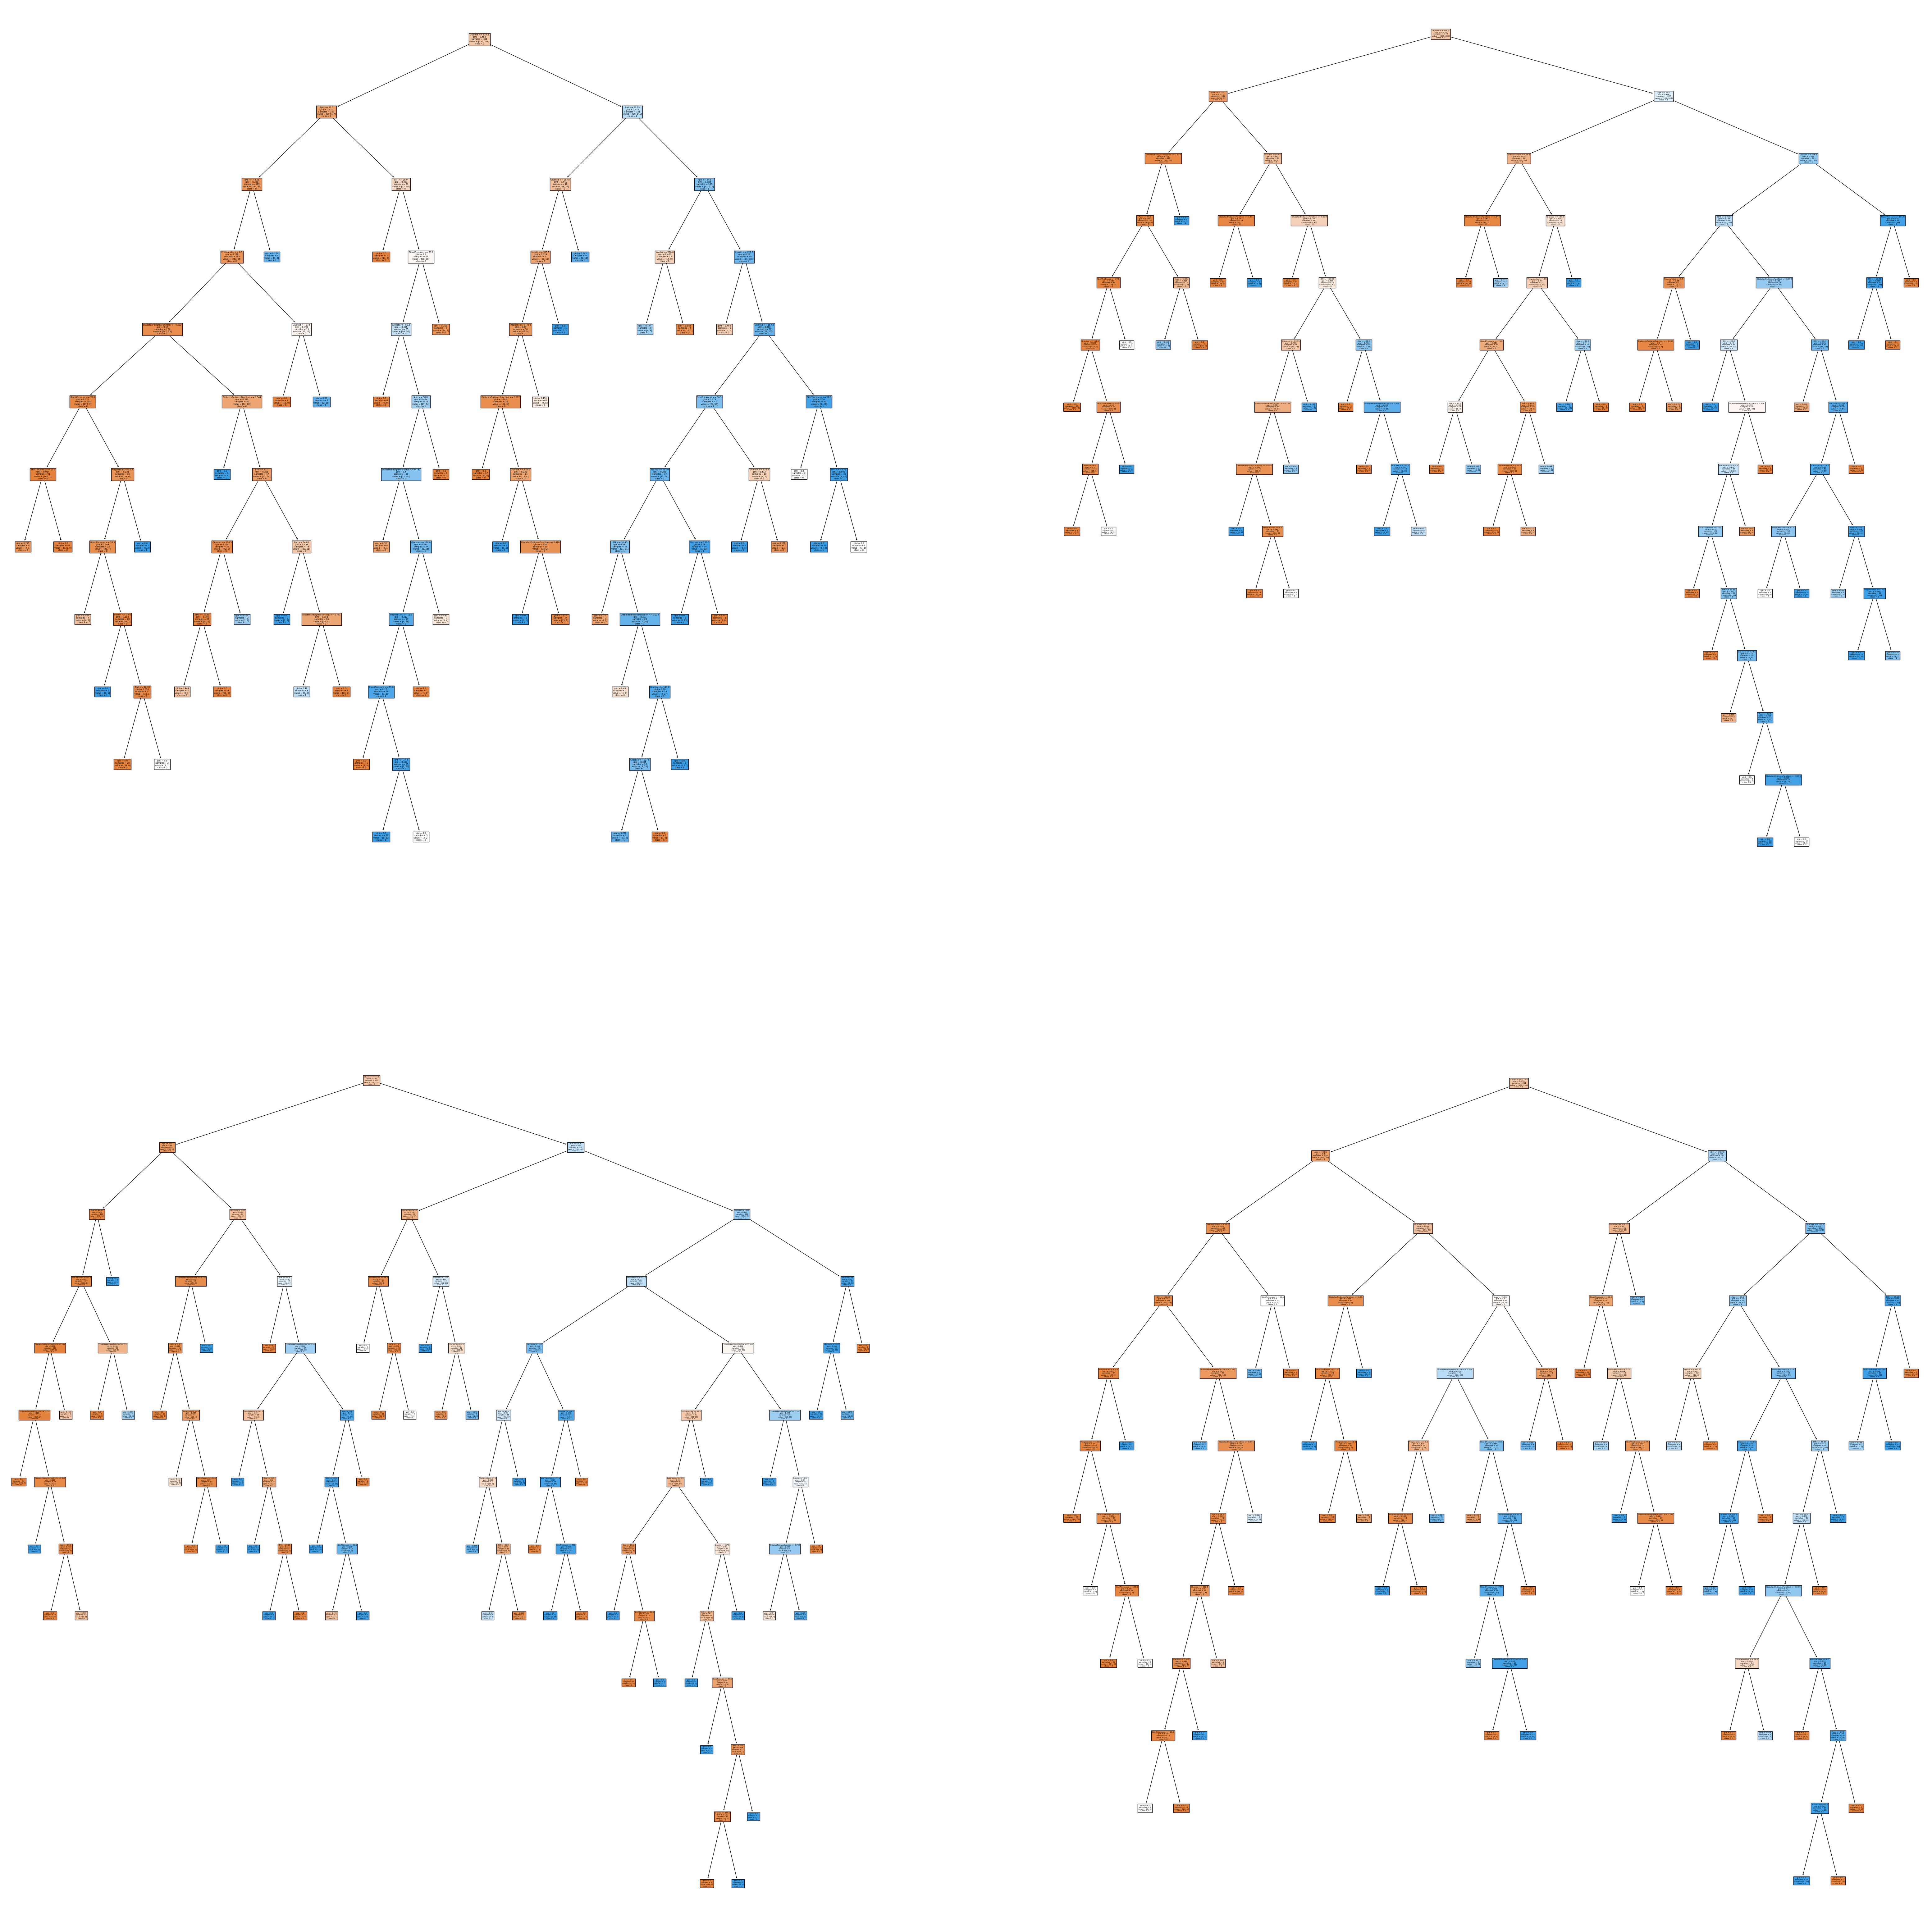

In [38]:
# Show the first 4 trees out of the 100 generated (default).
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (80, 80))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### 3) Model prediction

In [39]:
# Selection of the best model and final training:
best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
best_model = RandomForestClassifier(**best_combination)
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [40]:
# Predictions in the test set and training set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Print predictions
print(y_pred_test)
print(y_pred_train)

[0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 0 

In [41]:
# Calculate the accuracy in the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate the accuracy in the training set
accuracy_train =accuracy_score(y_train, y_pred_train)

print("Accuracy Test:", accuracy_test, "\nAccuracy Train:", accuracy_train)

Accuracy Test: 0.7857142857142857 
Accuracy Train: 0.9527687296416938


In [42]:
# Obtain the best hyperparameters
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)

# Hide warnings to keep the code clean
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Perform grid search
grid.fit(X_train, y_train)

# Obtain the best hyperparameters found
best_hyperparams = grid.best_params_

# Prints the best combination of hyperparameters 
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}


In [43]:
# Create a DataFrame with the search results in a grid
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014089,0.000583,0.001894,0.000083,None,sqrt,2,10,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.731707,0.813008,0.666667,0.731707,0.770492,0.742716,0.048453,67
1,0.062241,0.004712,0.004350,0.000516,None,sqrt,2,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.756098,0.804878,0.715447,0.772358,0.786885,0.767133,0.030448,5
2,0.123361,0.008263,0.008375,0.003497,None,sqrt,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.715447,0.788618,0.699187,0.756098,0.803279,0.752526,0.040277,30
3,0.019944,0.000811,0.003638,0.001746,None,sqrt,5,10,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.723577,0.772358,0.674797,0.731707,0.786885,0.737865,0.039528,73
4,0.083115,0.020342,0.005609,0.001564,None,sqrt,5,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.731707,0.804878,0.699187,0.747967,0.811475,0.759043,0.043134,14


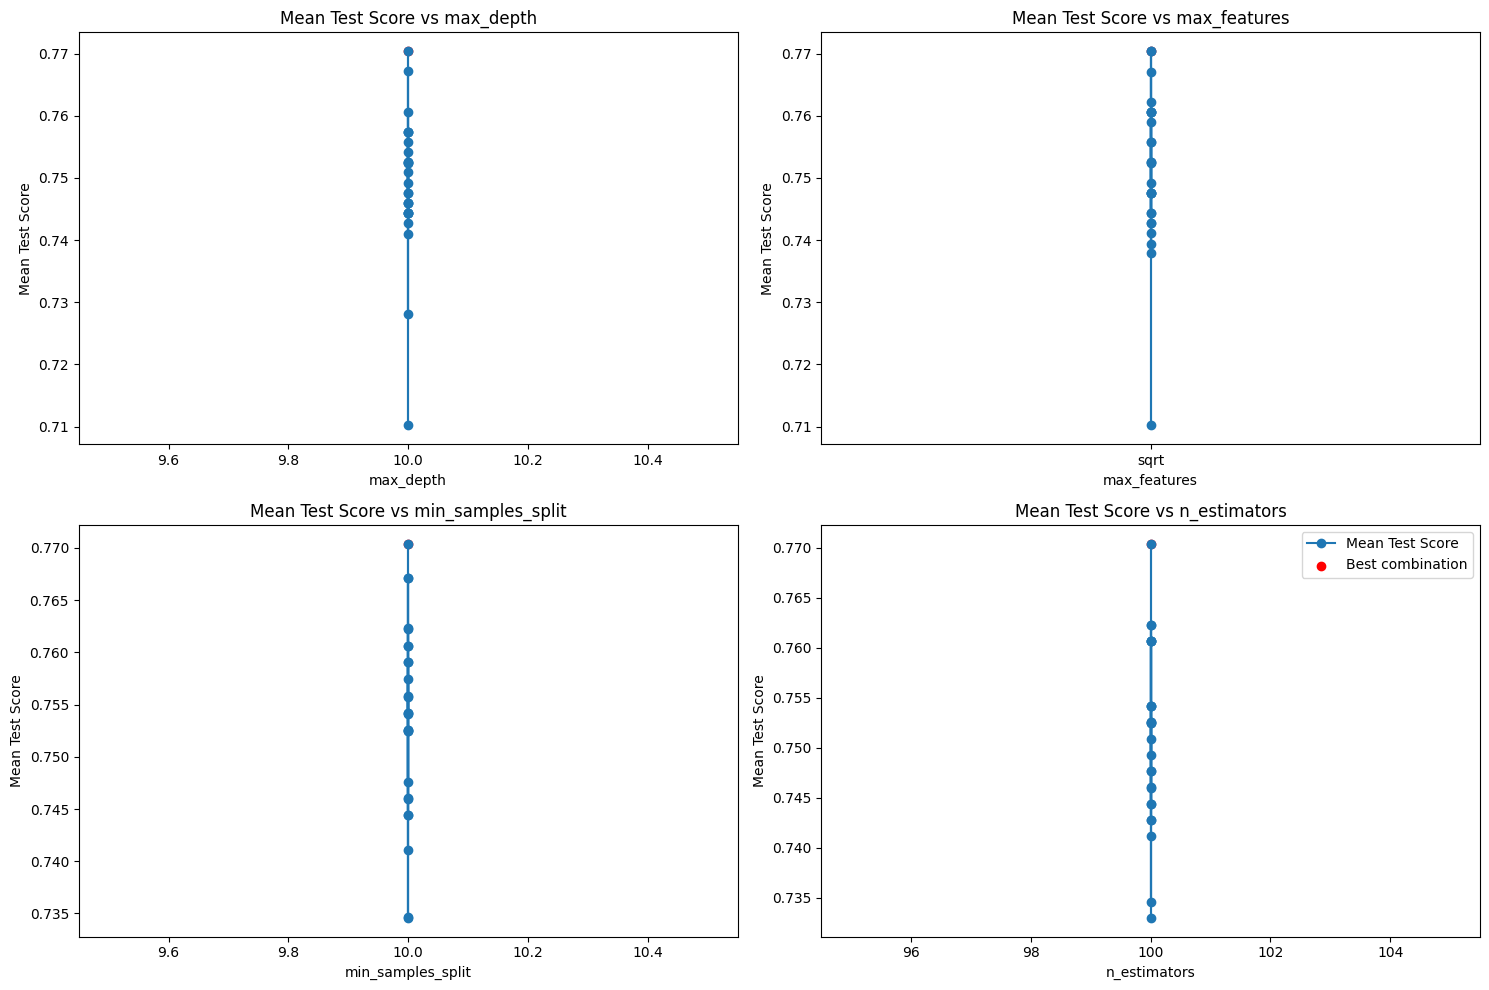

In [49]:
# Hyperparameters to plot (all hyperparameters that are in grid.best_params_)
hyperparams_to_plot = list(best_hyperparams.keys())

# Create subgraphs for each hyperparameter
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the subgraph matrix to facilitate the loop.
axes_flat = axes.flatten()

for i, param_to_plot in enumerate(hyperparams_to_plot):
    param_results = cv_results[cv_results[f'param_{param_to_plot}'] == best_hyperparams[param_to_plot]]

    # Plot results
    axes_flat[i].plot(param_results[f'param_{param_to_plot}'], param_results['mean_test_score'], marker='o', label='Mean Test Score')
    axes_flat[i].scatter(best_hyperparams[param_to_plot], grid.best_score_, color='red', label='Best combination')
    axes_flat[i].set_title(f'Mean Test Score vs {param_to_plot}')
    axes_flat[i].set_xlabel(param_to_plot)
    axes_flat[i].set_ylabel('Mean Test Score')

plt.tight_layout()
plt.legend()
plt.show()

### 4) Save the model

In [47]:
from pickle import dump

dump(model, open("/workspaces/MLRandom-Forest-PilarZarco/models/random_forest_classifier_default_71.sav", "wb"))